# Exploring the Data

In [2]:
# Import

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import algorithms
from sklearn import linear_model, preprocessing, tree, model_selection, svm
from sklearn.naive_bayes import GaussianNB

In [59]:
# Load dataframe

train_df = pd.read_csv("./train.csv")

# review
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# distribution of survival - want to explore survival on board the titanic
# Survived: 0 - No, 1 - Yes

print(train_df.Survived.value_counts(normalize=True)) #percentages of survival

0    0.616162
1    0.383838
Name: Survived, dtype: float64


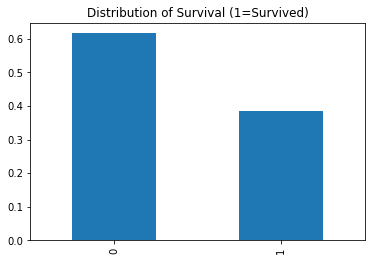

In [8]:
train_df.Survived.value_counts(normalize=True).plot(kind="bar")
plt.title("Distribution of Survival (1=Survived)")
plt.show()

In [10]:
# looking at gender distribution 
print(train_df.Sex.value_counts())

male      577
female    314
Name: Sex, dtype: int64


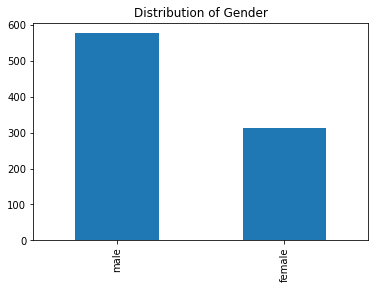

In [12]:
train_df.Sex.value_counts().plot(kind="bar")
plt.title("Distribution of Gender")
plt.show()

In [15]:
#import seaborn for easier plotting 
import seaborn as sns

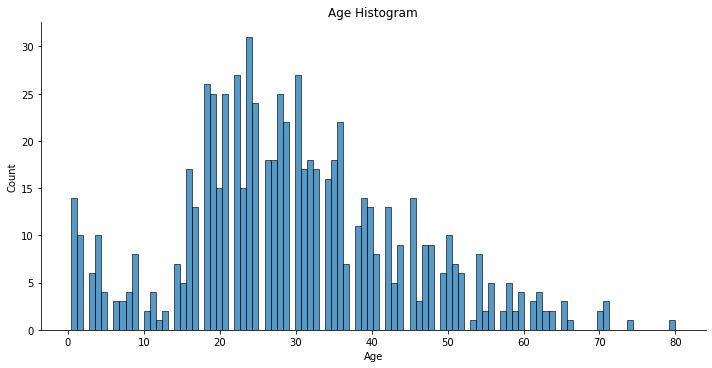

In [29]:
sns.displot(data=train_df.Age, bins=100, aspect=2)
plt.title("Age Histogram")
plt.show()


3    491
1    216
2    184
Name: Pclass, dtype: int64


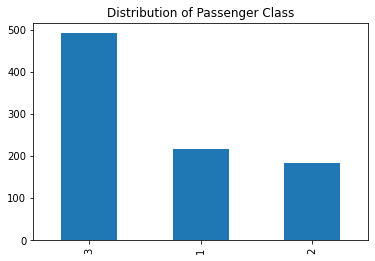

In [31]:
# distribution of passenger classes
print(train_df.Pclass.value_counts())
train_df.Pclass.value_counts().plot(kind="bar")
plt.title("Distribution of Passenger Class")
plt.show()

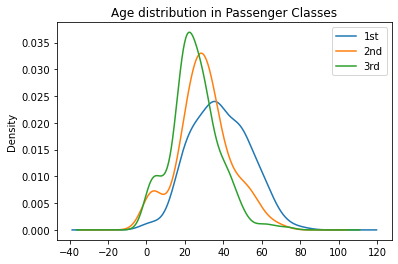

In [35]:
# Look at age distribution by classes
for i in [1,2,3]:
    train_df.Age[train_df.Pclass==i].plot(kind="kde")

plt.title("Age distribution in Passenger Classes")
plt.legend(("1st", "2nd", "3rd"))
plt.show()

In [36]:
print(train_df.Embarked.value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


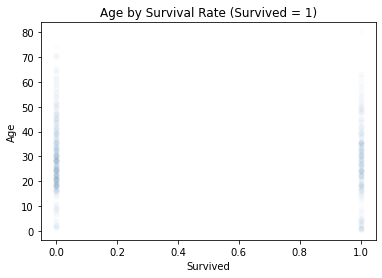

In [41]:
# Explore features in relation to survival rate 

# 1. Age vs Survival 
sns.scatterplot(data=train_df, x="Survived", y="Age", alpha=0.01)
plt.title("Age by Survival Rate (Survived = 1)")
plt.show()

female    0.681287
male      0.318713
Name: Sex, dtype: float64


<AxesSubplot:>

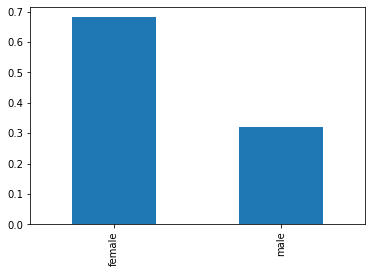

In [48]:
# 2. Gender vs Survival 
print((train_df.Sex[train_df.Survived == 1]).value_counts(normalize=True))

train_df.Sex[train_df.Survived == 1].value_counts(normalize=True).plot(kind='bar')

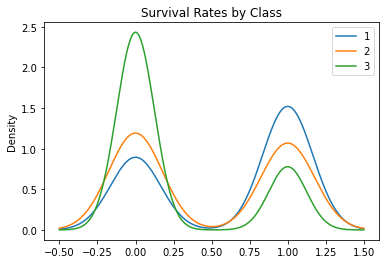

In [51]:
for i in [1,2,3]:
    train_df.Survived[train_df.Pclass==i].plot(kind="kde")

plt.title("Survival Rates by Class")
plt.legend(("1","2","3"))
plt.show()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64


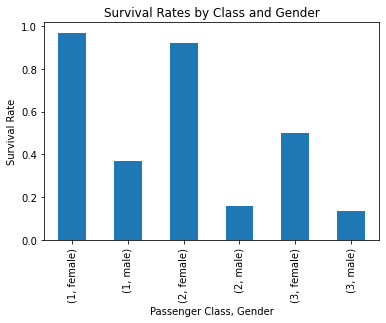

In [55]:
print(train_df.groupby(['Pclass','Sex']).Survived.mean())

train_df.groupby(['Pclass','Sex']).Survived.mean().plot(kind='bar')
plt.title("Survival Rates by Class and Gender")
plt.ylabel("Survival Rate")
plt.xlabel("Passenger Class, Gender")
plt.show()

## Analysis Points
### Gender
Gender appears to play a large role in the survival rates. There is a clear difference in survival rates for males vs. females. 
### Passenger Class 
The class that passengers fall in also appear to play a significant role in survival rates with a clear difference in survival rates between all 3 classes. 
### Age 
Age appears to have little significance for survival rates overall

-----

# Preparing Data for Modeling

In [61]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
# turn gender into a categorical variable (0 = "male", 1 = "female")
train_df.Sex = train_df.Sex.map({"male": 0,"female": 1})

# review
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [65]:
# fill NA results for Age with median of all ages
train_df["Age"]=train_df["Age"].fillna(train_df.Age.median())
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [68]:
#test hypothesis -> females survive
train_df["Hyp"]=0
train_df.loc[train_df.Sex == 1, "Hyp"]=1

train_df["Result"]=0
train_df.loc[train_df.Survived == train_df["Hyp"], "Result"]=1

#train_df.head(25)

train_df["Result"].value_counts(normalize=True) 

1    0.786756
0    0.213244
Name: Result, dtype: float64

-----

# Set up ML Models

### Linear Regression Model

In [94]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#set up feature names 
training_features_names=["Pclass","Age","Fare","Sex","SibSp","Parch"]

#set training target
training_target=train_df["Survived"].values

#create features df
training_features=train_df[training_features_names].values

training_features

array([[ 3.    , 22.    ,  7.25  ,  0.    ,  1.    ,  0.    ],
       [ 1.    , 38.    , 71.2833,  1.    ,  1.    ,  0.    ],
       [ 3.    , 26.    ,  7.925 ,  1.    ,  0.    ,  0.    ],
       ...,
       [ 3.    , 28.    , 23.45  ,  1.    ,  1.    ,  2.    ],
       [ 1.    , 26.    , 30.    ,  0.    ,  0.    ,  0.    ],
       [ 3.    , 32.    ,  7.75  ,  0.    ,  0.    ,  0.    ]])

In [95]:
#linear regression model fitting the entire data set
MLalgo = linear_model.LogisticRegression()
MLmodel = MLalgo.fit(training_features,training_target)

print("Linear model score", MLmodel.score(training_features, training_target))

Linear model score 0.7957351290684624


In [110]:
#cross validation run 50 times
scores = model_selection.cross_val_score(MLalgo,training_features,training_target,scoring='accuracy',cv=50)

In [111]:
scores.mean()

0.818627450980392

### Polynomial Model

In [100]:
poly = preprocessing.PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(training_features)

MLmodel = MLalgo.fit(poly_features,training_target)

print("Poly Score", MLmodel.score(poly_features,training_target))

Poly Score 0.8047138047138047


In [101]:
#cross validation run 50 times
scores = model_selection.cross_val_score(MLalgo,poly_features,training_target,scoring='accuracy',cv=50)
scores.mean()

0.7959477124183006

### Decision Trees

In [102]:
#trees 

MLalgo = tree.DecisionTreeClassifier(random_state=1)
MLmodel = MLalgo.fit(training_features,training_target)

In [103]:
print("Decision Tree Score",MLmodel.score(training_features,training_target))

Decision Tree Score 0.9797979797979798


In [105]:
#cross validation on scores
scores = model_selection.cross_val_score(MLalgo,training_features,training_target,scoring='accuracy',cv=50)
scores
scores.mean()

0.7859477124183006

#### why is the score for the decision tree so much higher than the mean of scores in cross validation?

This is an example of overfit! Our model doesn't generalize very well, it's is almost completely fit to the training values. 

##### Therefore let's prune our tree! 

In [107]:
#set a max depth of the tree, needs at least 4 samples to split
MLalgo = tree.DecisionTreeClassifier(random_state=1,max_depth=3,min_samples_split=4)
MLmodel = MLalgo.fit(training_features,training_target)

In [108]:
print("Decision Tree Score",MLmodel.score(training_features,training_target))

Decision Tree Score 0.8271604938271605


In [109]:
scores = model_selection.cross_val_score(MLalgo,training_features,training_target,scoring='accuracy',cv=50)
scores
scores.mean()

0.818627450980392

## Conclusion and Next Steps

- Feature Engineering 
    - Can try to predict Age based on title in name i.e. Miss -> younger etc.
    - Currently only looking at assuming empty ages as the median of all ages
- Data Selection
    - Can also take a look at the point of embarkment
- Algorithm Selection
    - Explore other algorithms